## Load data and packages

In [7]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
print(df.head())
 
df.columns = ["admit", "gre", "gpa", "prestige"] # df의 column 이름 바꾸기
print(df.columns)

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')


In [8]:
df.shape

(400, 4)

## summarize data

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000
admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64
prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


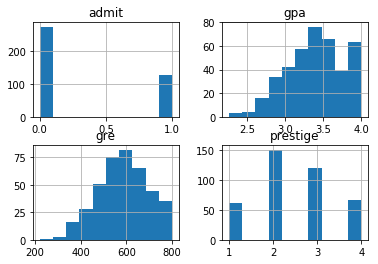

In [9]:
print(df.describe()) # 빈도수, 평균, 분산, 최솟값, 최댓값, 1/4분위수, 중위값, 1/4분위수를 나타냄
print(df.std()) # 분산 출력
print(pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))
 
df.hist()
pl.show()

## create dummy variables

In [18]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head(5)
 
#    prestige_1  prestige_2  prestige_3  prestige_4
# 0           0           0           1           0
# 1           0           0           1           0
# 2           1           0           0           0
# 3           0           0           0           1
# 4           0           0           0           1

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [19]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
data.head()
#    admit  gre   gpa  prestige_2  prestige_3  prestige_4
# 0      0  380  3.61           0           1           0
# 1      1  660  3.67           0           1           0
# 2      1  800  4.00           0           0           0
# 3      1  640  3.19           0           0           1
# 4      0  520  2.93           0           0           1
 
data['intercept'] = 1.0

In [20]:
data.head(10)

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0
5,1,760,3.00,1,0,0,1.0
6,1,560,2.98,0,0,0,1.0
7,0,400,3.08,1,0,0,1.0
8,1,540,3.39,0,1,0,1.0
9,0,700,3.92,1,0,0,1.0


## logistic regression

In [24]:
train_cols = data.columns[1:]
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: admit            Pseudo R-squared: 0.083   
Date:               2018-12-03 14:04 AIC:              470.5175
No. Observations:   400              BIC:              494.4663
Df Model:           5                Log-Likelihood:   -229.26 
Df Residuals:       394              LL-Null:          -249.99 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
gre          0.0023    0.0011   2.0699  0.0385   0.0001   0.0044
gpa          0.8040    0.3318   2.4231  0.0154   0.1537   1.4544
prestige_2  -0.6754    0.3165  -2.1342  0.0328  -1.2958  -0.0551
prestige_3  -1.3402  

## odds ratio

In [25]:
print(np.exp(result.params))

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64
